<a href="https://colab.research.google.com/github/CaneHornberger/DS/blob/main/Copy_of_12_CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Asset Pricing Model (CAPM)

### Assignment due Monday 22 April at noon

---

### Objectives

This assignment is primarily meant to refresh your numpy and pandas skills.  
Technical objectives are discussed below.  

- All the usual rules apply:  you may work together (groups of at most 3), make sure all names are easy to find at the top of the submission, submit the link to your working colab notebook


### Background

In finance, CAPM is a single-factor regression model used for analyzing (and predicting) excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output which has something to do with the risk of particular investments.

1.  Read [this brief synopsis](https://en.wikipedia.org/wiki/Capital_asset_pricing_model) of CAPM.


Don't worry if you don't understand all the terminology.
Look for a moment at the main formula (in the "Formula" section).  For us that formula will look like this:

\begin{aligned}
E(R_A) = R_f + \beta_A (E(R_{SP}) - R_f)
\end{aligned}

Some notes on the symbols in this formula:
- The formula is used to estimate $E(R_A)$.  The $E$ here stands for the expected value, and $R_A$ is the rate of return of the investment $A$.
- To use this formula, you therefore need to know the values of the other variables.
- The variable $R_f$ is the "risk-free rate," which is the amount of return you can get on an investment that has zero risk, like say a bank account.
This quantity changes over time but for our purposes we can treat it as a constant.  It is hard-coded into the code below.  Make sure you see where this variable occurs in the formula above.
- In this assignment the variable $R_{SP}$ is a measure of the rate of return of the overall market.  (The $E$ on the right side also means expected value.)
- The variable $\beta_A$ measures something about the relative risk of the investment A, relative to the overall market.  The technical objective of this assignment will be to compute $\beta_A$ below, and then to examine how sensitive it is to the specific data.
- The value you get for $\beta_A$ will be a number.  If it is greater than 1, it means (*very roughly*) that the investment A is more volatile than the overall market.  If it is less than 1, it means that the investment is less volatile than the overall market.  But **do not take this too seriously!** In particular see all the caveats at the wikipedia page.
- The A investment in our example is an individual stock (Apple).



2.  Load the packages and data.  (Note that the following code chunk also hard-codes the constant $R_f$.)  
The data lives in the file `capm_market_data` in the `data` folder on the `GitHub` site.

In [14]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6b830417653a429aa596008d8eaf76c71c84d710d649c84222ee2778951b7aa2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [15]:
!wget https://raw.githubusercontent.com/aaron-abrams-uva/DS1002-S24/main/data/capm_market_data.csv -O capm_market_data.csv

--2024-04-22 01:03:26--  https://raw.githubusercontent.com/aaron-abrams-uva/DS1002-S24/main/data/capm_market_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6047 (5.9K) [text/plain]
Saving to: ‘capm_market_data.csv’

capm_market_data.cs 100%[===================>]   5.91K  --.-KB/s    in 0s      

2024-04-22 01:03:27 (44.7 MB/s) - ‘capm_market_data.csv’ saved [6047/6047]



In [16]:
data = pd.read_csv("capm_market_data.csv")

In [17]:
data.head()

,date,spy_adj_close,aapl_adj_close
0,2020-01-02,321.555786,298.829956
1,2020-01-03,319.120911,295.924713
2,2020-01-06,320.338379,298.282715
3,2020-01-07,319.437653,296.879883
4,2020-01-08,321.140106,301.655548


In [18]:
import numpy as np
import pandas as pd
import io
import requests

# risk-free Treasury rate
R_f = 0.0175 / 252

3.  Look at some records.  
SPY is something that mirrors the S&P 500 ("the market").  
AAPL is the code for Apple stock.  
The values are closing prices, adjusted for splits and dividends.

In [19]:
# Display some records
print("First few records:")
print(data.head())

# Check the column names
print("\nColumn names:")
print(data.columns)


First few records:
         date  spy_adj_close  aapl_adj_close
0  2020-01-02     321.555786      298.829956
1  2020-01-03     319.120911      295.924713
2  2020-01-06     320.338379      298.282715
3  2020-01-07     319.437653      296.879883
4  2020-01-08     321.140106      301.655548

Column names:
Index(['date', 'spy_adj_close', 'aapl_adj_close'], dtype='object')


4.  Drop the date column

In [20]:
data.drop('date', axis=1, inplace=True)

# Display the modified DataFrame to confirm the column is dropped
print("DataFrame after dropping 'date' column:")
print(data.head())


DataFrame after dropping 'date' column:
   spy_adj_close  aapl_adj_close
0     321.555786      298.829956
1     319.120911      295.924713
2     320.338379      298.282715
3     319.437653      296.879883
4     321.140106      301.655548


5.  Compute daily returns (percentage changes in price) for both SPY and AAPL.
(Be sure to drop the first row of NaN.)  
Hint: pandas has functions to easily do this.  
Print the first 5 rows of returns.


In [21]:
# Calculate daily returns for SPY and AAPL
returns = data.pct_change().dropna()

# Print the first 5 rows of returns
print("First 5 rows of returns:")
print(returns.head())


First 5 rows of returns:
   spy_adj_close  aapl_adj_close
1      -0.007572       -0.009722
2       0.003815        0.007968
3      -0.002812       -0.004703
4       0.005330        0.016086
5       0.006781        0.021241


6.  Save the SPY and AAPL returns into separate numpy arrays.  
Print the first five values from each of the two arrays.


In [23]:
import numpy as np

# Extract SPY and AAPL returns into separate NumPy arrays
spy_returns = returns['spy_adj_close'].values
aapl_returns = returns['aapl_adj_close'].values

# Print the first five values from each array
print("First five values of SPY returns:")
print(spy_returns[:5])

print("\nFirst five values of AAPL returns:")
print(aapl_returns[:5])


First five values of SPY returns:
[-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]

First five values of AAPL returns:
[-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]


7.  Make arrays (one for SPY, one for AAPL) containing the *excess* returns by subtracting the constant $R_f$ from the returns.  
(Recall that $R_f$ is the "risk-free rate" meaning essentially that you could earn this much in interest if you didn't invest in anything.)  
Print the LAST five excess returns from both SPY and AAPL numpy arrays.

In [24]:
# Calculate excess returns for SPY and AAPL
spy_excess_returns = spy_returns - R_f
aapl_excess_returns = aapl_returns - R_f

# Print the last five excess returns from each array
print("Last five excess returns of SPY:")
print(spy_excess_returns[-5:])

print("\nLast five excess returns of AAPL:")
print(aapl_excess_returns[-5:])


Last five excess returns of SPY:
[-0.00576237  0.0101411  -0.00872841  0.01288957  0.00911779]

Last five excess returns of AAPL:
[ 0.00423088  0.00167981 -0.00468264  0.01647898  0.00680788]


8. Make a scatterplot with SPY excess returns on the $x$-axis and AAPL excess returns on the $y$-axis.  
If you need it, here is the [Matplotlib documentation]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

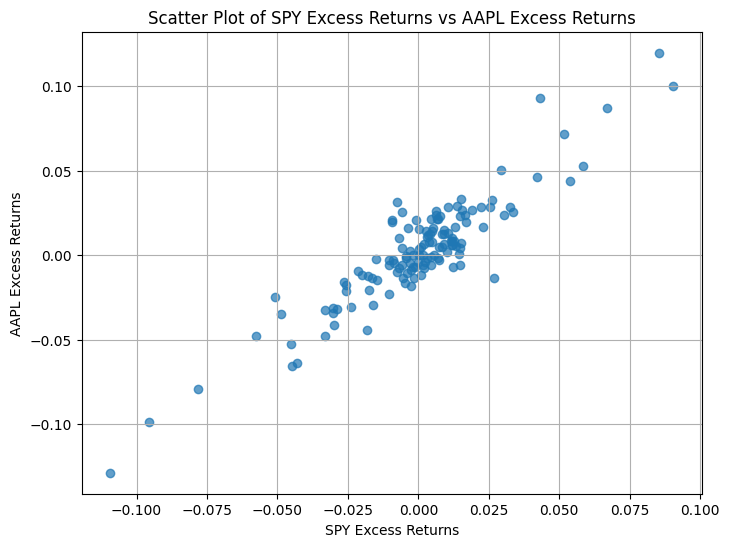

In [25]:
import matplotlib.pyplot as plt

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(spy_excess_returns, aapl_excess_returns, alpha=0.7)
plt.title('Scatter Plot of SPY Excess Returns vs AAPL Excess Returns')
plt.xlabel('SPY Excess Returns')
plt.ylabel('AAPL Excess Returns')
plt.grid(True)
plt.show()


The value of $\beta_A$ is computed from the arrays you built in problem 7, via a formula that uses some statistical functions called the "variance" and the "covariance."

Any individual 1-d array of numbers has a variance, which you can compute using `numpy`'s function `var()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.var.html)).  This is a number.

If you have two 1-d arrays of the same length, they collectively have something called a covariance which `numpy` also can compute using `cov()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)).

The covariance is also a number, but look at what happens when you send two 1-d arrays to `cov()`: it returns a $2\times 2$ matrix.  (Try it!)  The covariance we are looking for is the number that lives in both the top right and the bottom left of this matrix.  (Those two numbers should be the same.)  The top left and bottom right entries of the covariance matrix also have meaning, but we don't need them.



9. Use `numpy` functions as described above to compute the estimate of $\beta_A$, using the following formula:  
\begin{aligned} \beta_A= \frac{ \text{cov}(A,SP) }{ \text{var}(SP) } \end{aligned}
In our context, A will be the 1-d array you made in problem 7 for AAPL, and SP will be the 1-d array you made for SPY.

In [26]:
# Calculate covariance between SPY excess returns and AAPL excess returns
covariance_matrix = np.cov(spy_excess_returns, aapl_excess_returns)

# Extract the covariance value we need from the covariance matrix
covariance = covariance_matrix[0, 1]

# Calculate variance of SPY excess returns
spy_variance = np.var(spy_excess_returns)

# Calculate beta_A using the formula
beta_A = covariance / spy_variance

# Print the calculated beta_A
print("Beta_A (Market Beta) is:", beta_A)

Beta_A (Market Beta) is: 1.0956172644197222


You should have found that the beta estimate is greater than one.  
This means that the volatility of AAPL stock, given the data, and according to this particular (flawed) model,
is higher than the volatility of the S&P 500.

Bonus:  Is this something you can see on the plot you made?



Finally, let's look at how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

This is called *jackknifing*.



10. Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays `x` and `y` as inputs
- outputs a list of tuples, so that each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [30]:
import numpy as np

def beta_sensitivity(x, y):

    beta_estimates = []

    #jackknifing
    for i in range(len(x)):
        x_jackknife = np.delete(x, i).reshape(-1, 1)
        y_jackknife = np.delete(y, i)

        # Calculate covariance between y and x
        covariance_xy_jackknife = np.cov(y_jackknife, x_jackknife, rowvar=False)[0, 1]

        # Compute beta estimate using the formula
        beta_jackknife = covariance_xy_jackknife / np.var(x_jackknife)

        # Append tuple to the list
        beta_estimates.append((i, beta_jackknife))

    return beta_estimates


beta_estimates = beta_sensitivity(spy_excess_returns, aapl_excess_returns)
print("Beta estimates (Jackknife method):")
print(beta_estimates)


Beta estimates (Jackknife method):
[(0, 1.095384550080496), (1, 1.095618983478552), (2, 1.095555855660709), (3, 1.0952630299046586), (4, 1.0949054764016837), (5, 1.09578886233597), (6, 1.0948925461451777), (7, 1.0954060132439711), (8, 1.0958504733995793), (9, 1.0955676643922243), (10, 1.095522630756034), (11, 1.0955167293082573), (12, 1.095682719337653), (13, 1.095667729356666), (14, 1.0961250818297312), (15, 1.09329618047602), (16, 1.094143130486898), (17, 1.095923435584647), (18, 1.0958882306772806), (19, 1.0905719662693143), (20, 1.0966173646132007), (21, 1.0934857099235793), (22, 1.0964285556445763), (23, 1.095497389928883), (24, 1.0950973493407097), (25, 1.096078856104857), (26, 1.0958188603863008), (27, 1.0947671044525784), (28, 1.0955591643761426), (29, 1.0957246092807271), (30, 1.095143637017769), (31, 1.0953547263031709), (32, 1.0953144237710755), (33, 1.0941901088599828), (34, 1.0909525280287262), (35, 1.0947126657767698), (36, 1.0964195583594853), (37, 1.0868133375174476), (

11. Call `beta_sensitivity()` on the arrays A and SP from earlier and print the first ten tuples of output.

In [31]:
# Call beta
beta_estimates = beta_sensitivity(aapl_excess_returns, spy_excess_returns)

#first ten tuples of output
print("First ten tuples of output (observation row dropped, beta estimate):")
print(beta_estimates[:10])


First ten tuples of output (observation row dropped, beta estimate):
[(0, 0.7780271291138472), (1, 0.7779227611028062), (2, 0.7780186010891412), (3, 0.7784391413984395), (4, 0.7789941470436159), (5, 0.7778864515205234), (6, 0.7790012519236995), (7, 0.779119870445966), (8, 0.7782475196059937), (9, 0.7778763569006095)]
